In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats.stats import pearsonr
from copy import deepcopy

In [2]:
data = pd.read_csv('for_graphs_dr.csv',engine='python', sep=';', header=0)
data.head()

,REP_DATE,PRODUCT_NAME,LV4,good_bad,WOE_ACCRUED_to_limit,WOE_ACCRUED_DIV_REST_OD,WOE_min_ratio_fact_plan,WOE_avg_ratio_fact_plan,WOE_max_ratio_fact_plan,WOE_count_payments,...,WOE_part_connect_calls_6m,WOE_part_rpc_6m,WOE_part_promises_6m,WOE_part_promises2_6m,WOE_part_connect_promises_6m,WOE_part_connect_promises2_6m,WOE_part_kept_6m,WOE_days_not_paid,WOE_part_1_good_in_1_good_bad,Model_Product
0,31Jan2016,Кредитные карты ФЛ (интегрируемые банки),Кредитные карты,0.0,0.805863,-0.243959,1.045291,1.045291,1.045291,1.045291,...,1.036308,1.036308,1.036308,0.102268,0.752483,0.102973,0.06266,-0.150868,0.070312,Карты
1,31Jan2016,Кредиты ФЛ (интегрируемые банки),Кредит ФЛ (интегрируемые дочерние банки),0.0,-0.092313,-0.243959,1.045291,1.045291,1.045291,1.045291,...,1.036308,1.036308,1.036308,0.102268,0.752483,0.102973,0.06266,-0.150868,0.070312,Потребы
2,31Jan2016,Кредитные карты ФЛ (интегрируемые банки),Кредитные карты,1.0,0.805863,-0.243959,1.045291,1.045291,1.045291,1.045291,...,1.036308,1.036308,1.036308,0.102268,0.752483,0.102973,0.06266,-0.150868,0.070312,Карты
3,31Jan2016,Кредитные карты ФЛ (интегрируемые банки),Кредитные карты,1.0,0.805863,-0.243959,1.045291,1.045291,1.045291,1.045291,...,1.036308,1.036308,1.036308,0.102268,0.752483,0.102973,0.06266,-0.150868,0.070312,Карты
4,31Jan2016,Кредитные карты ФЛ (интегрируемые банки),Кредитные карты,0.0,0.805863,-0.243959,1.045291,1.045291,1.045291,1.045291,...,1.036308,1.036308,1.036308,0.102268,0.752483,0.102973,0.06266,-0.150868,0.070312,Карты


In [3]:
cols = data.columns
woe_cols = []
for x in cols:
    if str(x)[:3] == 'WOE':
        woe_cols.append(x)
woe_cols

['WOE_ACCRUED_to_limit',
 'WOE_ACCRUED_DIV_REST_OD',
 'WOE_min_ratio_fact_plan',
 'WOE_avg_ratio_fact_plan',
 'WOE_max_ratio_fact_plan',
 'WOE_count_payments',
 'WOE_sum_payment',
 'WOE_our_active',
 'WOE_our_closed',
 'WOE_min_loan_duration',
 'WOE_avg_loan_duration',
 'WOE_max_loan_duration',
 'WOE_min_month_between',
 'WOE_avg_month_between',
 'WOE_max_month_between',
 'WOE_min_fact_loans_term',
 'WOE_avg_fact_loans_term',
 'WOE_max_fact_loans_term',
 'WOE_min_ratio_fact_plan_month',
 'WOE_avg_ratio_fact_plan_month',
 'WOE_del_frequency_all_old',
 'WOE_del_frequency_all',
 'WOE_max_days_delinquency',
 'WOE_del_frequency_all_sum',
 'WOE_ratio_del_pay',
 'WOE_max_ratio_sum_del',
 'WOE_part_sms_delivered',
 'WOE_part_connect_calls',
 'WOE_part_rpc',
 'WOE_part_promises',
 'WOE_part_promises2',
 'WOE_part_connect_promises',
 'WOE_part_connect_promises2',
 'WOE_part_kept',
 'WOE_part_kept_part',
 'WOE_del_loan_lenth',
 'WOE_part_sms_delivered_6m',
 'WOE_part_connect_calls_6m',
 'WOE_part

In [4]:
xxx = pd.to_datetime(list(data.REP_DATE))
xxx

DatetimeIndex(['2016-01-31', '2016-01-31', '2016-01-31', '2016-01-31',
               '2016-01-31', '2016-01-31', '2016-01-31', '2016-01-31',
               '2016-01-31', '2016-01-31',
               ...
               '2018-08-31', '2018-08-31', '2018-08-31', '2018-08-31',
               '2018-08-31', '2018-08-31', '2018-08-31', '2018-08-31',
               '2018-08-31', '2018-08-31'],
              dtype='datetime64[ns]', length=707591, freq=None)

In [6]:
data['Real_date'] = xxx

In [5]:
data_IV = pd.read_csv('iv_beh_all.csv',engine='python', sep=';', header=0)

In [7]:
ordered_list = list(data_IV['Variable'].unique())

In [9]:
ordered_list

['part_promises_6m',
 'part_rpc_6m',
 'part_rpc',
 'ACCRUED_DIV_REST_OD',
 'part_promises',
 'ACCRUED_to_limit',
 'part_connect_calls_6m',
 'part_connect_calls',
 'part_connect_promises_6m',
 'part_connect_promises',
 'part_promises2',
 'max_ratio_sum_del',
 'ratio_del_pay',
 'part_promises2_6m',
 'max_days_delinquency',
 'days_not_paid',
 'part_1_good_in_1_good_bad',
 'del_frequency_all_old',
 'part_connect_promises2',
 'del_frequency_all_sum',
 'our_active',
 'part_connect_promises2_6m',
 'sum_payment',
 'max_loan_duration',
 'del_frequency_all',
 'min_loan_duration',
 'avg_loan_duration',
 'count_payments',
 'min_ratio_fact_plan',
 'part_sms_delivered_6m',
 'max_ratio_fact_plan',
 'part_kept',
 'avg_ratio_fact_plan',
 'part_kept_6m',
 'min_ratio_fact_plan_month',
 'part_sms_delivered',
 'our_closed',
 'min_month_between',
 'min_fact_loans_term',
 'avg_ratio_fact_plan_month',
 'avg_fact_loans_term',
 'del_loan_lenth',
 'avg_month_between',
 'max_fact_loans_term',
 'max_month_between'

In [10]:
woe_cols_ord = []
for z in ordered_list:
    if "WOE_" + z in woe_cols:
        woe_cols_ord.append("WOE_" + z)
woe_cols_ord

['WOE_part_promises_6m',
 'WOE_part_rpc_6m',
 'WOE_part_rpc',
 'WOE_ACCRUED_DIV_REST_OD',
 'WOE_part_promises',
 'WOE_ACCRUED_to_limit',
 'WOE_part_connect_calls_6m',
 'WOE_part_connect_calls',
 'WOE_part_connect_promises_6m',
 'WOE_part_connect_promises',
 'WOE_part_promises2',
 'WOE_max_ratio_sum_del',
 'WOE_ratio_del_pay',
 'WOE_part_promises2_6m',
 'WOE_max_days_delinquency',
 'WOE_days_not_paid',
 'WOE_part_1_good_in_1_good_bad',
 'WOE_del_frequency_all_old',
 'WOE_part_connect_promises2',
 'WOE_del_frequency_all_sum',
 'WOE_our_active',
 'WOE_part_connect_promises2_6m',
 'WOE_sum_payment',
 'WOE_max_loan_duration',
 'WOE_del_frequency_all',
 'WOE_min_loan_duration',
 'WOE_avg_loan_duration',
 'WOE_count_payments',
 'WOE_min_ratio_fact_plan',
 'WOE_part_sms_delivered_6m',
 'WOE_max_ratio_fact_plan',
 'WOE_part_kept',
 'WOE_avg_ratio_fact_plan',
 'WOE_part_kept_6m',
 'WOE_min_ratio_fact_plan_month',
 'WOE_part_sms_delivered',
 'WOE_our_closed',
 'WOE_min_month_between',
 'WOE_min_f

In [99]:
woe_cols_ord.index('WOE_our_active')

20

In [13]:
# def get_product(x):
#     if x in ['Кредитные карты','Кредитные карты ФЛ (интегрируемые дочерние банки)','Овердрафты по платежным картам']:
#         return 'Карты'
#     if x in ['Автокредитование (интегрируемые дочерние банки)', 'Автокредитование классическое', 
#              'Кредит ФЛ (интегрируемые дочерние банки)'
#             , 'Потребительское кредитование'
#             , 'Кредитование сотрудников'
#             , 'Кредиты VIP клиентов'
#             , 'Экспресс кредиты'] :
#         return 'Потребы'
#     if x in ['Ипотека'
#             , 'Ипотечное кредитование (доч.банки)'] :
#         return 'Ипотека'

In [14]:
# data['модель'] = data['LV4'].apply(get_product)
# data.head()

In [15]:
# data_potreb = data[data['Model_Product'] == 'Потребы']
# data_cc = data[data['Model_Product'] == 'Карты']
# data_m = data[data['Model_Product'] == 'Ипотека']

In [16]:
mat_data = data[data['Real_date'] < '2018-03-31']

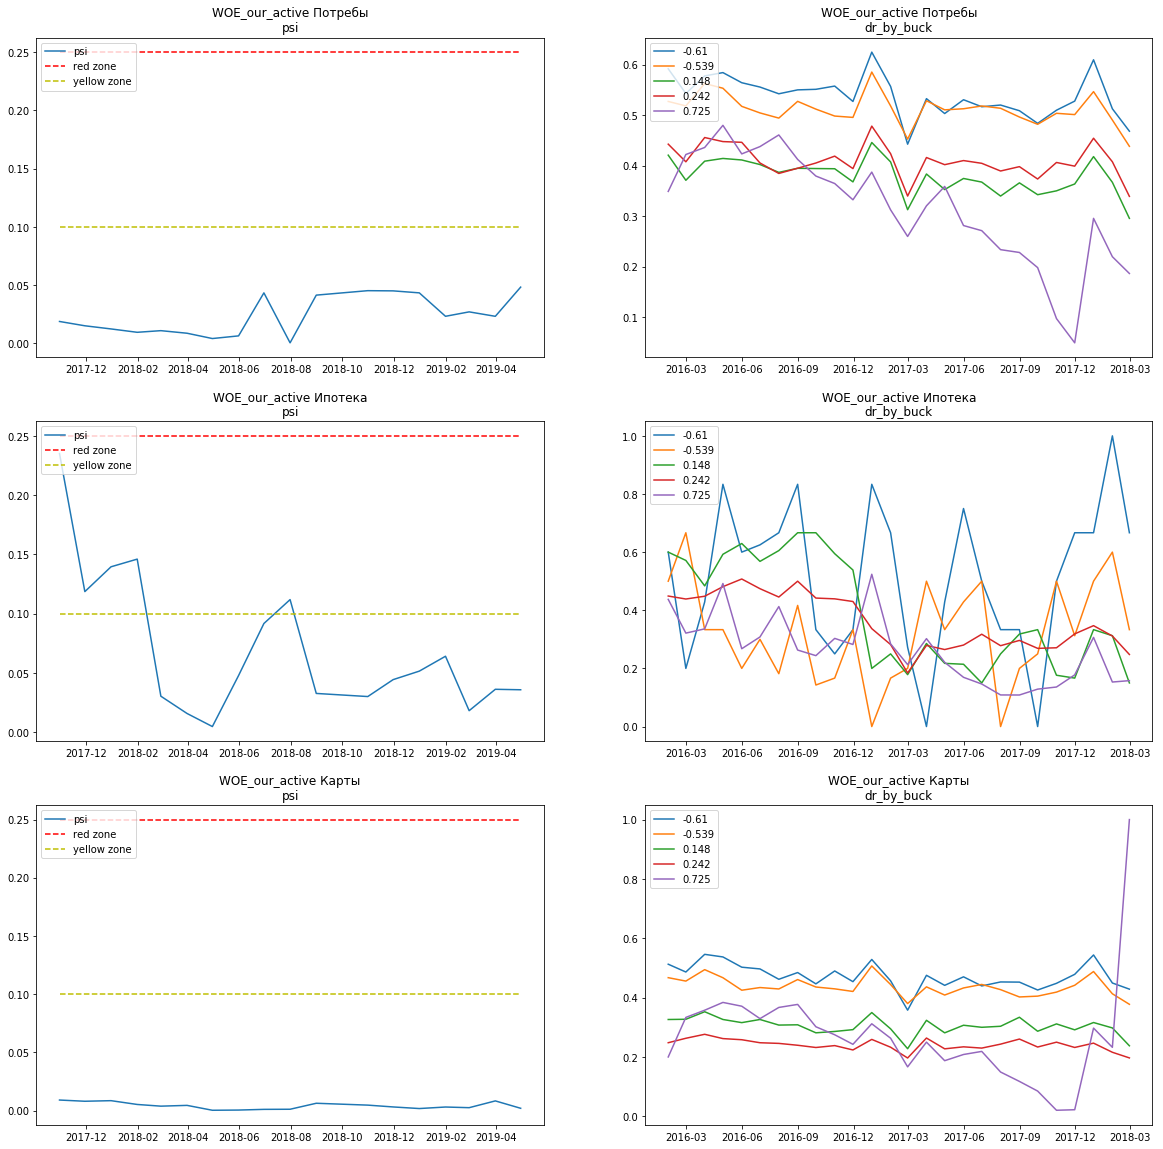

In [109]:
pd.set_option('display.width', 2000)
for var in woe_cols_ord[20:21]:
    fig, axes = plt.subplots(3, 2, figsize=(20, 20))
    kj = 0
    for product in ['Потребы', 'Ипотека', 'Карты']:
        ax = axes[kj][1]
        bx = axes[kj][0]
        kj += 1
        local_sample_for_dr = mat_data[['Real_date', 'good_bad', var]][mat_data['Model_Product'] == product]
        local_sample_for_psi = data[['Real_date', 'good_bad', var]][(data['Model_Product'] == product) &
                                                                   (data['Real_date'] >= '2017-10-31')]
        table_for_dr = local_sample_for_dr.groupby([var, 'Real_date'], as_index=True)
        table_for_psi = local_sample_for_psi.groupby([var, 'Real_date'], as_index=True)
        gg = pd.DataFrame({},index=[])
        gl = pd.DataFrame({},index=[])
        gg["dr"] = table_for_dr.sum().good_bad/table_for_dr.count().good_bad
        gl['counts'] = table_for_psi.count().good_bad
        
        date = []
        woe = []
        date_psi = []
        woe_psi = []
        [date.append(gg.T.columns[i][1]) for i in range(len(gg.T.columns))]
        [woe.append(gg.T.columns[i][0]) for i in range(len(gg.T.columns))]
        [date_psi.append(gl.T.columns[i][1]) for i in range(len(gl.T.columns))]
        [woe_psi.append(gl.T.columns[i][0]) for i in range(len(gl.T.columns))]
        gg['date'] = date 
        gg['woe'] = woe
        gl['date'] = date_psi
        gl['woe'] = woe_psi
        gl0 = gl.groupby([date_psi])
        
        gl00 = pd.DataFrame({},index=[])
        gl00['counts_by_month'] = gl0.sum().counts
        
        gl00['date'] = list(gl00.T.columns)
       
        
        gg = gg.reset_index(drop=True)
        gl = gl.reset_index(drop=True)
        gl2 = gl.groupby([woe_psi], as_index=True)
        diff_woe = list(gg.woe.unique())
        gl3 = pd.DataFrame({},index=[])
        gl3['counts'] = gl2.sum().counts
        gl3['woe'] = diff_woe
        gl3['parts_avg'] = gl3['counts']/gl3['counts'].sum()
        gll = gl.merge(gl00, how = 'left', on = 'date')
        gll['parts'] = gll['counts']/gll['counts_by_month']
        glll = gll.merge(gl3, how = 'left', on = 'woe')
        glll['lp'] = (glll['parts'] - glll['parts_avg'])*np.log(glll['parts']/glll['parts_avg'])
        gllll = glll.groupby(['date'], as_index=True)
        psi = list(gllll.sum().lp)
        bx.plot(gl00['date'], psi, label = 'psi')
        red = [0.25]*len(gl00['date'])
        yell = [0.1]*len(gl00['date'])
        bx.plot(gl00['date'], red, color = 'r', linestyle='dashed', label = 'red zone')
        bx.plot(gl00['date'], yell, color = 'y', linestyle='dashed', label = 'yellow zone')
        bx.set_title(var + ' ' + product +'\n' + 'psi')
        bx.legend(loc='upper left')
#     fig, ax = plt.subplots(figsize=(15, 8))
    # ax.set_title('Combined debt growth over time')
    # ax.legend(loc='upper left')
    # ax.set_ylabel('Total debt')
    # ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
    # fig.tight_layout()
        for x in diff_woe:
            new_gg = gg[gg['woe'] == x]
            dr = list(new_gg.dr)
            #part_avg = new_gl
            date = sorted(list(new_gg.date))
            ax.plot(date, dr, label = round(x,3))
        ax.set_title(var + ' ' + product +'\n' + 'dr_by_buck')
        ax.legend(loc='upper left')
    plt.show()